In [ ]:
import torch
import torchvision
from torchvision import datasets
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
from matplotlib import pyplot as plt
import random
import numpy as np

In [ ]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

In [ ]:
img, _ = training_data[0]

In [ ]:
plt.imshow(img.permute(2,1,0))

In [ ]:
class AutoEncoder(torch.nn.Module):
    def __init__(self, nb_input, bottleneck):
        super().__init__()
        self.encoder_weight = torch.rand((nb_input, bottleneck), requires_grad=True)
        self.encoder_bias = torch.rand((1, bottleneck), requires_grad=True)
        self.decoder_weight = torch.rand((bottleneck, nb_input), requires_grad=True)
        self.decoder_bias = torch.rand((1, nb_input), requires_grad=True)

    def forward(self, x):
        x = x @ self.encoder_weight + self.encoder_bias  # (batch_size, bottleneck)
        x = torch.nn.ReLU()(x)
        x = x @ self.decoder_weight + self.decoder_bias  # (batch_size, nb_input)
        return x

    def mutate(self, mutation_power):
        self.encoder_weight += torch.rand_like(self.encoder_weight) * mutation_power
        self.encoder_bias += torch.rand_like(self.encoder_bias) * mutation_power
        self.decoder_weight += torch.rand_like(self.decoder_weight) * mutation_power
        self.decoder_bias += torch.rand_like(self.decoder_bias) * mutation_power

In [ ]:
max_epoch = 10000
mutation_power = 0.1
loss_fn = torch.nn.MSELoss()

SGD

In [ ]:
ae = AutoEncoder(28*28, 10)
sgd = torch.optim.SGD([
    ae.encoder_weight,
    ae.encoder_bias,
    ae.decoder_weight,
    ae.decoder_bias
], lr=0.01)  # Add learning rate

train_data = img.flatten().unsqueeze(0)  # shape: (1, 784)
loss_fn = torch.nn.MSELoss()
max_epoch = 100000
for epoch in range(max_epoch):
    pred = ae(train_data)
    loss = loss_fn(pred, train_data)
    sgd.zero_grad()
    loss.backward()
    sgd.step()
test =  ae(img.flatten())
plt.imshow(test.reshape(28,28).detach())
plt.show()


In [ ]:
ae  = AutoEncoder(28*28, 10)
adam = torch.optim.Adam([
    ae.encoder_weight,
    ae.encoder_bias,
    ae.decoder_weight,
    ae.decoder_bias
], lr=0.01)
max_epoch = 5000
train_data = img.flatten()
for epoch in range(max_epoch):
    pred = ae(train_data)
    loss = loss_fn(pred, train_data)
    adam.zero_grad()
    loss.backward()
    adam.step()
test =  ae(img.flatten())
plt.imshow(test.reshape(28,28).detach())
plt.show()

In [67]:
max_epoch = 5000
child_count = 30
mutation_power = 0.01
train_data = img.flatten()
min_loss = loss_fn(ae(train_data),train_data)
with torch.no_grad():
    for epoch in range(max_epoch):
        for i in range(child_count):
            child_ae = AutoEncoder(28*28, 10)
            child_ae.load_state_dict(ae.state_dict())
            child_ae.mutate(mutation_power)
            pred = child_ae(train_data)
            loss = loss_fn(pred,train_data)
            if(loss.item() < min_loss):
                min_loss = loss.item()
                ae.load_state_dict(child_ae.state_dict())
        print(min_loss)

537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
537641.5625
5376

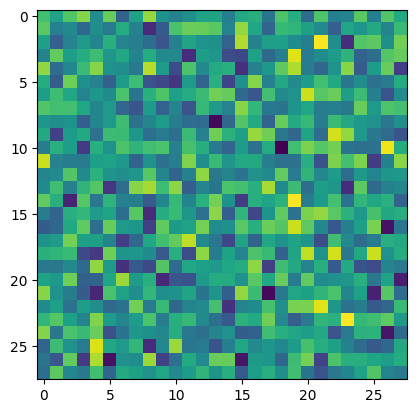

In [68]:
test =  ae(img.flatten())
plt.imshow(test.reshape(28,28).detach())
plt.show()